In [1]:
import torch
import numpy as np
import random
import torch.nn as nn
import torch.nn.functional as F
import itertools
import pdb
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import sys

sys.path.insert(0, './src')

from data import Dataset
from kernels import HMC_our
from models import Gen_network, Inf_network
from target import NN_bernoulli
from utils import plot_digit_samples, get_samples
from args import get_args

In [2]:
torchType = torch.float32

In [3]:
def set_seeds(rand_seed):
#     torch.cuda.manual_seed_all(rand_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(rand_seed)
    np.random.seed(rand_seed)
    random.seed(rand_seed)

seed = 1 # 1337 #
set_seeds(seed)

In [4]:
args = get_args()

In [5]:
encoder = Inf_network(kwargs=args).to(args.device)
target = NN_bernoulli(kwargs=args, model=Gen_network(args.z_dim, args), device=args.device).to(args.device)

transitions = nn.ModuleList([HMC_our(kwargs=args).to(args.device) for _ in range(args['K'])])
params = [encoder.parameters(), target.parameters(), transitions.parameters()]
    
optimizer = torch.optim.Adam(params=itertools.chain(*params))

In [6]:
dataset = Dataset(args, device=args.device)

In [7]:
random_code = args.std_normal.sample((64, args.z_dim))

  0%|          | 0/400 [00:00<?, ?it/s]

On batch number 1/500 and on k = 1 we have for  0: 0.5199999883770943 and for +1: 0.47999998927116394
On batch number 101/500 and on k = 1 we have for  0: 0.4999999888241291 and for +1: 0.4999999888241291
On batch number 201/500 and on k = 1 we have for  0: 0.41999999061226845 and for +1: 0.5799999870359898
On batch number 301/500 and on k = 1 we have for  0: 0.5699999872595072 and for +1: 0.42999999038875103
On batch number 401/500 and on k = 1 we have for  0: 0.4499999899417162 and for +1: 0.549999987706542


  0%|          | 1/400 [00:18<2:04:52, 18.78s/it]

Current epoch: 1 	 Current ELBO: -263.84326171875
Saved samples to ./pics/mnist_epoch_0_K_1_N_5.png
On batch number 1/500 and on k = 1 we have for  0: 0.46999998949468136 and for +1: 0.5299999881535769
On batch number 101/500 and on k = 1 we have for  0: 0.029999999329447746 and for +1: 0.9699999783188105
On batch number 201/500 and on k = 1 we have for  0: 0.4499999899417162 and for +1: 0.549999987706542
On batch number 301/500 and on k = 1 we have for  0: 0.46999998949468136 and for +1: 0.5299999881535769
On batch number 401/500 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136


  0%|          | 2/400 [00:37<2:04:15, 18.73s/it]

Current epoch: 2 	 Current ELBO: -280.04791259765625
Saved samples to ./pics/mnist_epoch_1_K_1_N_5.png
On batch number 1/500 and on k = 1 we have for  0: 0.4499999899417162 and for +1: 0.549999987706542
On batch number 101/500 and on k = 1 we have for  0: 0.549999987706542 and for +1: 0.4499999899417162
On batch number 201/500 and on k = 1 we have for  0: 0.4599999897181988 and for +1: 0.5399999879300594
On batch number 301/500 and on k = 1 we have for  0: 0.4499999899417162 and for +1: 0.549999987706542
On batch number 401/500 and on k = 1 we have for  0: 0.42999999038875103 and for +1: 0.5699999872595072


  1%|          | 3/400 [00:56<2:03:41, 18.69s/it]

Current epoch: 3 	 Current ELBO: -388.7711181640625
Saved samples to ./pics/mnist_epoch_2_K_1_N_5.png
On batch number 1/500 and on k = 1 we have for  0: 0.46999998949468136 and for +1: 0.5299999881535769
On batch number 101/500 and on k = 1 we have for  0: 0.3899999912828207 and for +1: 0.6099999863654375
On batch number 201/500 and on k = 1 we have for  0: 0.2699999939650297 and for +1: 0.7299999836832285
On batch number 301/500 and on k = 1 we have for  0: 0.04999999888241291 and for +1: 0.9499999787658453
On batch number 401/500 and on k = 1 we have for  0: 0.3399999924004078 and for +1: 0.6599999852478504


  1%|          | 4/400 [01:14<2:03:16, 18.68s/it]

Current epoch: 4 	 Current ELBO: -1896.8740234375
Saved samples to ./pics/mnist_epoch_3_K_1_N_5.png
On batch number 1/500 and on k = 1 we have for  0: 0.3999999910593033 and for +1: 0.5999999865889549
On batch number 101/500 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136
On batch number 201/500 and on k = 1 we have for  0: 0.4499999899417162 and for +1: 0.549999987706542
On batch number 301/500 and on k = 1 we have for  0: 0.4999999888241291 and for +1: 0.4999999888241291
On batch number 401/500 and on k = 1 we have for  0: 0.4999999888241291 and for +1: 0.4999999888241291


  1%|▏         | 5/400 [01:33<2:02:49, 18.66s/it]

Current epoch: 5 	 Current ELBO: -409.4996032714844
Saved samples to ./pics/mnist_epoch_4_K_1_N_5.png
On batch number 1/500 and on k = 1 we have for  0: 0.46999998949468136 and for +1: 0.5299999881535769
On batch number 101/500 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943
On batch number 201/500 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943
On batch number 301/500 and on k = 1 we have for  0: 0.46999998949468136 and for +1: 0.5299999881535769
On batch number 401/500 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943


  2%|▏         | 6/400 [01:51<2:02:25, 18.64s/it]

Current epoch: 6 	 Current ELBO: -245.5962371826172
Saved samples to ./pics/mnist_epoch_5_K_1_N_5.png
On batch number 1/500 and on k = 1 we have for  0: 0.5599999874830246 and for +1: 0.4399999901652336
On batch number 101/500 and on k = 1 we have for  0: 0.3899999912828207 and for +1: 0.6099999863654375
On batch number 201/500 and on k = 1 we have for  0: 0.549999987706542 and for +1: 0.4499999899417162
On batch number 301/500 and on k = 1 we have for  0: 0.5199999883770943 and for +1: 0.47999998927116394
On batch number 401/500 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943


  2%|▏         | 7/400 [02:10<2:02:03, 18.64s/it]

Current epoch: 7 	 Current ELBO: -239.16632080078125
Saved samples to ./pics/mnist_epoch_6_K_1_N_5.png
On batch number 1/500 and on k = 1 we have for  0: 0.4499999899417162 and for +1: 0.549999987706542
On batch number 101/500 and on k = 1 we have for  0: 0.5399999879300594 and for +1: 0.4599999897181988
On batch number 201/500 and on k = 1 we have for  0: 0.4499999899417162 and for +1: 0.549999987706542
On batch number 301/500 and on k = 1 we have for  0: 0.4599999897181988 and for +1: 0.5399999879300594
On batch number 401/500 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136


  2%|▏         | 8/400 [02:29<2:01:41, 18.63s/it]

Current epoch: 8 	 Current ELBO: -232.21487426757812
Saved samples to ./pics/mnist_epoch_7_K_1_N_5.png
On batch number 1/500 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136
On batch number 101/500 and on k = 1 we have for  0: 0.549999987706542 and for +1: 0.4499999899417162
On batch number 201/500 and on k = 1 we have for  0: 0.4599999897181988 and for +1: 0.5399999879300594
On batch number 301/500 and on k = 1 we have for  0: 0.5099999886006117 and for +1: 0.4899999890476465
On batch number 401/500 and on k = 1 we have for  0: 0.4899999890476465 and for +1: 0.5099999886006117


  2%|▏         | 9/400 [02:47<2:01:21, 18.62s/it]

Current epoch: 9 	 Current ELBO: -234.25587463378906
Saved samples to ./pics/mnist_epoch_8_K_1_N_5.png
On batch number 1/500 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943
On batch number 101/500 and on k = 1 we have for  0: 0.46999998949468136 and for +1: 0.5299999881535769
On batch number 201/500 and on k = 1 we have for  0: 0.47999998927116394 and for +1: 0.5199999883770943
On batch number 301/500 and on k = 1 we have for  0: 0.40999999083578587 and for +1: 0.5899999868124723
On batch number 401/500 and on k = 1 we have for  0: 0.4499999899417162 and for +1: 0.549999987706542


  2%|▎         | 10/400 [03:06<2:01:02, 18.62s/it]

Current epoch: 10 	 Current ELBO: -266.88427734375
Saved samples to ./pics/mnist_epoch_9_K_1_N_5.png
On batch number 1/500 and on k = 1 we have for  0: 0.5099999886006117 and for +1: 0.4899999890476465
On batch number 101/500 and on k = 1 we have for  0: 0.40999999083578587 and for +1: 0.5899999868124723
On batch number 201/500 and on k = 1 we have for  0: 0.5099999886006117 and for +1: 0.4899999890476465
On batch number 301/500 and on k = 1 we have for  0: 0.46999998949468136 and for +1: 0.5299999881535769
On batch number 401/500 and on k = 1 we have for  0: 0.4599999897181988 and for +1: 0.5399999879300594


  3%|▎         | 11/400 [03:24<2:00:43, 18.62s/it]

Current epoch: 11 	 Current ELBO: -237.2966766357422
Saved samples to ./pics/mnist_epoch_10_K_1_N_5.png
On batch number 1/500 and on k = 1 we have for  0: 0.5099999886006117 and for +1: 0.4899999890476465
On batch number 101/500 and on k = 1 we have for  0: 0.4899999890476465 and for +1: 0.5099999886006117
On batch number 201/500 and on k = 1 we have for  0: 0.5299999881535769 and for +1: 0.46999998949468136
On batch number 301/500 and on k = 1 we have for  0: 0.5399999879300594 and for +1: 0.4599999897181988
On batch number 401/500 and on k = 1 we have for  0: 0.42999999038875103 and for +1: 0.5699999872595072


  3%|▎         | 12/400 [03:43<2:00:24, 18.62s/it]

Current epoch: 12 	 Current ELBO: -225.4737091064453
Saved samples to ./pics/mnist_epoch_11_K_1_N_5.png
On batch number 1/500 and on k = 1 we have for  0: 0.4999999888241291 and for +1: 0.4999999888241291
On batch number 101/500 and on k = 1 we have for  0: 0.5599999874830246 and for +1: 0.4399999901652336
On batch number 201/500 and on k = 1 we have for  0: 0.4399999901652336 and for +1: 0.5599999874830246


KeyboardInterrupt: 

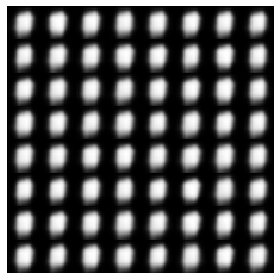

In [8]:
print_info_ = 1

torch_log_2 = torch.tensor(np.log(2.), device=args.device, dtype=args.torchType)

if args.step_conditioning == 'fixed':
    cond_vectors = [args.std_normal.sample((args.z_dim, )) for _ in range(args.K)]
else:
    cond_vectors = [None] * args.K


def compute_loss(z_new, p_new, u, p_old, x, sum_log_alpha, sum_log_jac, sum_log_sigma):
    log_p = target.get_logdensity(z=z_new, x=x) + args.std_normal.log_prob(p_new).sum(1)
    log_r = -args.K * torch_log_2
    log_m = args.std_normal.log_prob(u).sum(1) + args.std_normal.log_prob(p_old).sum(1) - sum_log_jac - sum_log_sigma + sum_log_alpha
    elbo_full = log_p + log_r - log_m
    grad_elbo = torch.mean(elbo_full + elbo_full.detach() * sum_log_alpha)
    return elbo_full, grad_elbo
  
# with torch.autograd.detect_anomaly():
for ep in tqdm(range(args.num_epoches)): # cycle over epoches
    for b_num, batch_train in enumerate(dataset.next_train_batch()): # cycle over batches
        if args.step_conditioning == 'free':
            cond_vectors = [args.std_normal.sample((args.z_dim, )) for _ in range(args.K)]
        optimizer.zero_grad()

        mu, sigma = encoder(batch_train) # sample mu and sigma from encoder
        u = args.std_normal.sample(mu.shape) # sample random tensor for reparametrization trick
        z = mu + sigma * u # reperametrization trick
        p_old = args.std_normal.sample(mu.shape)

        sum_log_alpha = torch.zeros(mu.shape[0], dtype=args.torchType, device=args.device) # for grad log alpha accumulation
        sum_log_jacobian = torch.zeros(mu.shape[0], dtype=args.torchType, device=args.device) # for log_jacobian accumulation
        sum_log_sigma = torch.sum(torch.log(sigma), 1)
        p = p_old
        for k in range(args.K):
            # sample alpha - transition probabilities 
            z, p, log_jac, current_log_alphas, directions, _ = transitions[k].make_transition(q_old=z, x=batch_train,
                                                                p_old=p, k=cond_vectors[k], target_distr=target) # sample a_i -- directions

            if ep  % print_info_ == 0 and b_num % (100 * print_info_) == 0:
                print('On batch number {}/{} and on k = {} we have for  0: {} and for +1: {}'.format(b_num + 1,
                                                                        dataset.train.shape[0] // args['train_batch_size'],
                                                                           k + 1,
                                                    (directions==0.).to(float).mean(),
                                                                (directions==1.).to(float).mean()))
            # Accumulate alphas
            sum_log_alpha = sum_log_alpha + current_log_alphas
            sum_log_jacobian = sum_log_jacobian + log_jac  # refresh log jacobian

        elbo_full, grad_elbo = compute_loss(z_new=z, p_new=p, u=u, p_old=p_old, x=batch_train, sum_log_alpha=sum_log_alpha,
                                            sum_log_jac=sum_log_jacobian, sum_log_sigma=sum_log_sigma)
    #     pdb.set_trace()
        (-grad_elbo).backward()
        optimizer.step()
        optimizer.zero_grad()
        # Bias squared
    if ep % print_info_ == 0:
        print('Current epoch:', (ep + 1), '\t', 'Current ELBO:', elbo_full.detach().mean().item())
        plot_digit_samples(samples=get_samples(target.decoder, random_code), args=args, epoch=ep)